In [1]:
import pandas as pd
df = pd.read_csv("data/train.csv")
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## EDA（探索的データ分析）

### 行数・列数を確認する `df.shape`

In [2]:
# 行数・列数を確認
df.shape

(1460, 81)

### データ型を確認する `df.info()`
- 各列のデータ型（int、float、object）
- 欠損値数（Non-null count）
- メモリ使用量
が分かる。

**機械学習の前処理ではこの情報が重要**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 欠損値の量を一覧にする
**実務で必須**

どの列にどれぐらいNaNがあるかが一瞬で分かる

In [4]:
df.isnull().sum().sort_values(ascending=False)  # 欠損の多い順

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

## EDAの読み取り・実務の考え方
### 1. 行数・列数
出力結果より：  
→ データ量としては十分  
→ 81列は特徴量（説明変数）が非常に多い  
→ 前処理が必要な列も必ず多い

この時点での結論：
「とにかく前処理が重要になるタイプのデータ」
### 2. info() の読み取り
int64が35、float64が3 → 合計38列で、数値はかなり多い。  
objectが43 → カテゴリ列が多すぎる。カテゴリをそのままモデルに入れるとエラーになる。  

つまり、
- one-hot encoding（ダミー変数化）が必要
- 文字列 → 数値化 が必要

**【欠損値ありの列（重要）】**  
info() からわかる欠損：
- LotFrontage（約259欠損）
- Alley（ほぼ全部欠損）
- MasVnrType（約872欠損）
- MasVnrArea（8欠損）
- Bsmt関連（約30〜40欠損）
- Electrical（1欠損）

ポイントは：  
**"欠損が多すぎてほぼ使えない列がある"**  
→ Alley（道路状況）  
→ PoolQC（プールクオリティ、99％欠損）  
→ MiscFeature（特殊設備、95％欠損）

実務では：  
**「何でもかんでも使う」ではなく “使わない判断” が重要。**

### 3. 欠損値の分布
欠損数トップを見ると、ほぼ全滅。  
★この情報からの実務的な読み取り
1. PoolQC（プールのグレード） → 家にプールある家がほぼない
2. MiscFeature（特殊設備） → 特殊なのでほぼ誰も持ってない
3. Alley（裏路地） → データ取ってない家がほとんど
4. Fence（フェンス） → データ収集されてない家が多い

→ こういう列は分析でも不要になるケースが多い  
（特徴量として弱すぎる、欠損補完をする意味が薄い）

### 現時点で分かること
① 特徴量（列）が多い → 前処理と特徴選択が大事  
② カテゴリ列が43列 → One-hot encoding が必須  
③ 欠損が極端に多い列は切り捨て候補  
④ 数値列は多く、モデルとの相性は良い  
⑤ SalePrice（目的変数）は int → 回帰問題  

つまりこのデータは、  
“きれいな機械学習教材”ではなく、“実務寄りで前処理の練習に最適”なデータ
ということ。

## 基本統計量を見る

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 目的変数（SalePrice）の分布

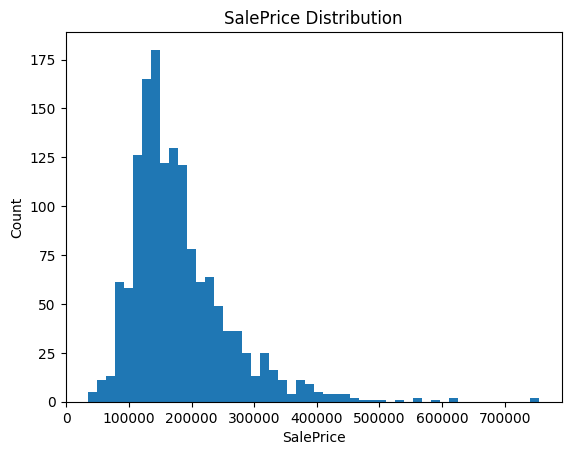

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=50)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

## 数値列の相関を計算

In [7]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## 散布図を描いてみる

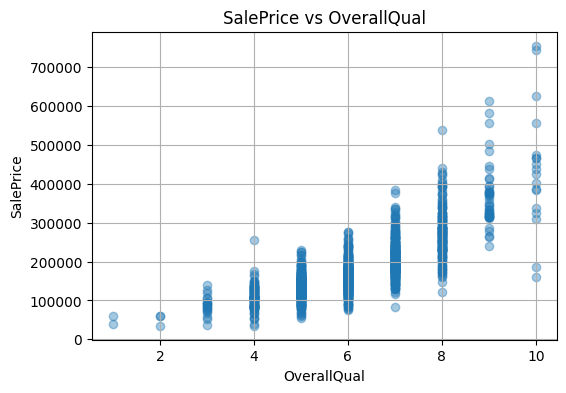

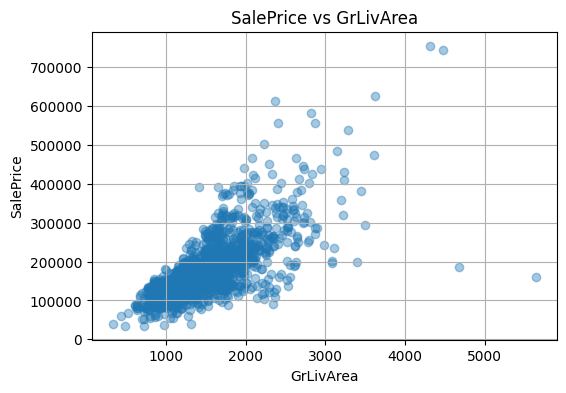

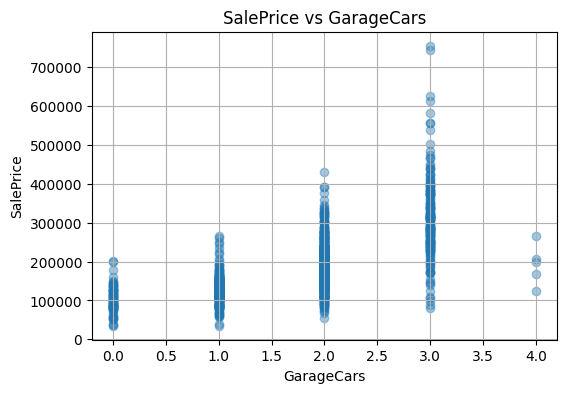

In [8]:
import matplotlib.pyplot as plt

top_features = ['OverallQual', 'GrLivArea', 'GarageCars']

for col in top_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['SalePrice'], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {col}')
    plt.grid(True)
    plt.show()

## SalePrice を対数変換して分布を見る

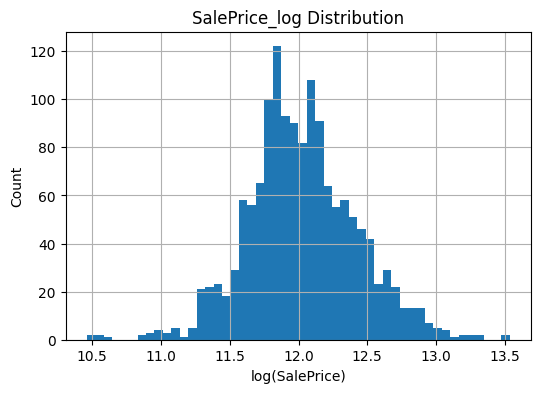

In [9]:
import numpy as np

df['SalePrice_log'] = np.log(df['SalePrice'])

plt.figure(figsize=(6, 4))
plt.hist(df['SalePrice_log'], bins=50)
plt.title("SalePrice_log Distribution")
plt.xlabel("log(SalePrice)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## 外れ値候補の抽出

In [10]:
# GrLiveArea の外れ値候補を抽出（大きいのに安い家）
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,12.126759
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,11.982929


### 外れ値の結果より
両方とも土地（GrLivArea）が極端に大きいのに、価格（SalesPrice）が低すぎる。  
実務においては、以下のような理由で、価格モデルに含めると邪魔になるケースが多い。
- 宅地以外の用途が混ざっている
- 税制・権利関係の問題
- データ入力ミス
- 部分的な特殊条件

**ではどうするか？（実務的判断）**  
**結論：**  
**この２件は学習用データから除外するのが一般的。**  
  
理由：
- モデルが「広い土地なのに安い」と学習してしまい、予想が歪む
- 頻度が少ない特殊ケースを説明しようとして過学習する
- 線形回帰・木モデルともに外れ値の影響が大きい

In [11]:
# 外れ値として除外するIDをリスト化
outlier_ids = outliers['Id'].tolist()
outlier_ids

[524, 1299]

In [12]:
# 外れ値を除外したDataFrameを作る
df_clean = df[~df['Id'].isin(outlier_ids)]
df_clean.shape

(1458, 82)

## 欠損値の全体を再確認する

In [13]:
df_clean.isnull().sum().sort_values(ascending=False)

PoolQC           1452
MiscFeature      1404
Alley            1367
Fence            1177
MasVnrType        872
                 ... 
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
SalePrice_log       0
Length: 82, dtype: int64

In [14]:
missing = df_clean.isnull().sum().sort_values(ascending=False)
missing[missing > 0]    # 欠損がある列だけ表示

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageYrBlt       81
GarageFinish      81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

## 欠損値処理の方針を確定する
A ほぼ使い物にならない列 → 列ごと削除（drop）  
B 設備が「無い」ことを意味する欠損 → NA などのカテゴリで補完（None または 0）  
C 数値で補完すべき列 → 中央値 or 平均を使う  
D 1件だけの欠損 → ほかで同じカテゴリを補完

## 欠損値処理パート

### 1. df_preprocessed のコピーを作る
（df_clean をもとにして、新しいデータセット df_preprocessed を作る）

In [15]:
df_pre = df_clean.copy()

### 2. 削除する列（Aカテゴリ）を drop

In [16]:
cols_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df_pre = df_pre.drop(columns=cols_drop)

### 3. 設備が無いことを意味する欠損を補完（Bカテゴリ）

In [17]:
none_cols = [
    'FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageType', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond'
]

for col in none_cols:
    df_pre[col] = df_pre[col].fillna("None")

### 4. 数値の欠損を 0 で補完

In [18]:
df_pre['GarageYrBlt'] = df_pre['GarageYrBlt'].fillna(0)
df_pre['MasVnrArea'] = df_pre['MasVnrArea'].fillna(0)

### 5. LotFrontage（敷地前面長） → 中央値で補完（Cカテゴリ）

In [19]:
df_pre['LotFrontage'] = df_pre['LotFrontage'].fillna(df_pre['LotFrontage'].median())

### 6. Electrical（1件の欠損）→ 最頻値（mode）で補完（Dカテゴリ）

In [20]:
df_pre['Electrical'] = df_pre['Electrical'].fillna(df_pre['Electrical'].mode()[0])

### 7. 欠損が全部消えたか確認

In [21]:
df_pre.isnull().sum().sum()

np.int64(872)

欠損処理漏れがあったので処理する

In [22]:
df_pre.isnull().sum().sort_values(ascending=False)

MasVnrType       872
Id                 0
MSZoning           0
LotFrontage        0
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SalePrice_log      0
Length: 78, dtype: int64

MasVnrType はBカテゴリなので、None で補完する

In [23]:
df_pre['MasVnrType'] = df_pre['MasVnrType'].fillna("None")

欠損がなくなったか確認

In [24]:
df_pre.isnull().sum().sum()

np.int64(0)

## One-Hot Encoding （カテゴリ→数値への変換）
機械学習モデルは文字（カテゴリ）を扱えないので、  
`object` 型の列をすべて数値化（0/1のダミー変数）にする必要がある。

[参考](https://deepage.net/features/pandas-get-dummies.html#:~:text=%E3%81%95%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82-,%E3%83%80%E3%83%9F%E3%83%BC%E5%A4%89%E6%95%B0%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B,-%E3%81%BE%E3%81%9A%E3%81%AF%E7%B0%A1%E5%8D%98%E3%81%AA)

[参考](https://deepage.net/features/pandas-get-dummies.html#:~:text=0%20%201%20%20%20%200-,%E5%A4%9A%E9%87%8D%E5%85%B1%E7%B7%9A%E6%80%A7%E3%82%92%E9%98%B2%E3%81%90,-%E4%BE%8B%E3%81%88%E3%81%B0%5B%E2%80%98A%E2%80%99%2C%E2%80%99B)

### 1. ダミー変数化を実行する

In [25]:
df_dummy = pd.get_dummies(df_pre, drop_first=True)
df_dummy.shape

(1458, 248)

### 2. 目的変数（SalePrice）を分離する
機械学習では、
- x（説明変数）
- y（目的変数）

に分けるのが基本。

In [26]:
x = df_dummy.drop('SalePrice', axis=1)
y = df_dummy['SalePrice']

- 特徴量：機械学習のモデルに入力するデータ。  
- 目的変数：機械学習のモデルが予測や分類する対象のデータ。
- 説明変数：機械学習のモデルが目的変数を予測や分類するために使用するデータ。

In [27]:
x.shape, y.shape

((1458, 247), (1458,))

## 線形回帰モデルで学習

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
score = model.score(x, y)
score

0.9684661809949697

## train_test_split で“本当の精度”を測る

### train / test に分割する

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,  # データの20％をテスト用に分ける
    random_state=42 # 再現性のための固定値
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1166, 247), (292, 247), (1166,), (292,))

### 線形回帰で学習（train）→ 評価（test）

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

train_score, test_score

(0.9693951927269695, 0.9434499901922164)

## 決定木（DecisionTreeRegressor）

### モデル import

In [31]:
from sklearn.tree import DecisionTreeRegressor

### モデルを作る

In [32]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
train_score_dt = dt_model.score(x_train, y_train)
test_score_dt = dt_model.score(x_test, y_test)

train_score_dt, test_score_dt

(1.0, 0.9992790665715986)

## ランダムフォレスト（RandomForestRegressor）

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,   # 森の本数
    max_depth=None,
    random_state=42,
    n_jobs=-1   # CPU全部使う（高速化）
)

rf_model.fit(x_train, y_train)

train_score_rf = rf_model.score(x_train, y_train)
test_score_rf = rf_model.score(x_test, y_test)

train_score_rf, test_score_rf

(0.9993017912103411, 0.9998157051608648)